## Состав:
### 1) Кысь Татьяна Толстая
### 2) Метро 2033 Дмитрий Глуховский

In [2]:
from nltk import word_tokenize
from nltk.tag import pos_tag_sents
import csv
from collections import Counter
import pymorphy2
import matplotlib.pyplot as plt
import pandas as pd

morph = pymorphy2.MorphAnalyzer()

In [3]:
def sentence_clear(text):
    text = text.replace(':\n', ' ')
    text = text.replace('\n', ' ')
    text = text.replace('?', '.')
    text = text.replace('!', '.')
    text = text.replace(',', '')
    text = text.replace('-', '')
    text = text.replace('—', '')
    text = text.replace('–', '')
    text = text.replace('_', '')
    text = text.replace('"', ' ')
    text = text.lower()
    
    return text

def clear(text):
    text = text.replace('.', '')
    
    return text

In [4]:
def postag(tokens):
    ptags = []
    for word in tokens:
        tag = morph.parse(word)[0].tag
        ptags.append([word, tag])
    return ptags

In [5]:
def simpletags(tags):
    for i in range(len(tags)):
        tags[i] = tags[i][1].POS
    return tags

In [6]:
def pos_count(tags):
    pos_counts = []
    cnt = Counter()
    for item in tags:
        cnt[item] += 1
    for key, value in cnt.items():
        pos_counts.append([key, value]) 
    return pos_counts

In [7]:
def toFixed(f, n=0):
    return float('{:.3f}'.format(f))

def pos_percent(counts, words):
    for i in range(len(counts)):
        counts[i].append(toFixed(counts[i][1] * 100 / words, 3))
    return counts

In [8]:
def routine(filename, gender):
    text = ""
    with open(filename, 'r') as f:
        text = f.read()
    
    text = sentence_clear(text)
    sentences = text.split('.')
    lens = 0
    count= 0
    for sentence in sentences:
        count+=1;
        lens+=len(word_tokenize(sentence))
    
    sr_len = lens/count
    
    print("average length "+gender+" "+str(sr_len), "\n\n")
    
    text = clear(text)
    tokenized = word_tokenize(text)
    ptags = postag(tokenized)
    stags = simpletags(ptags)
    
    count = pos_count(stags)
    
    with open(gender+'.csv', 'w') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['pos', 'count' ])
        for pos in count:
            writer.writerow(pos) 
    
    words = len(tokenized)
    percents = pos_percent(count, words)
    return percents

In [9]:
fem_data = routine("Кысь.txt", 'female')
mal_data = routine("Метро2033.txt", 'male')

average length female 7.8185216834009825 


average length male 13.083195910290238 




In [10]:
fem_df = pd.DataFrame(fem_data, columns=["pos", "count", "%"])
fem_df['pos'] = fem_df['pos'].astype(str)
mal_df = pd.DataFrame(mal_data, columns=["pos", "count", "%"])
mal_df['pos'] = mal_df['pos'].astype(str)

In [11]:
fem_df

,pos,count,%
0,NOUN,18542,25.335
1,VERB,10399,14.209
2,CONJ,9963,13.613
3,ADJS,682,0.932
4,ADJF,6611,9.033
5,PREP,6155,8.410
6,PRCL,5369,7.336
7,INTJ,474,0.648
8,ADVB,3792,5.181
9,GRND,289,0.395


In [12]:
mal_df

,pos,count,%
0,CONJ,17702,11.158
1,ADVB,12574,7.926
2,ADJF,17092,10.773
3,NOUN,36853,23.229
4,VERB,20899,13.173
5,INFN,4610,2.906
6,ADJS,1413,0.891
7,PREP,16238,10.235
8,NPRO,12154,7.661
9,None,2381,1.501


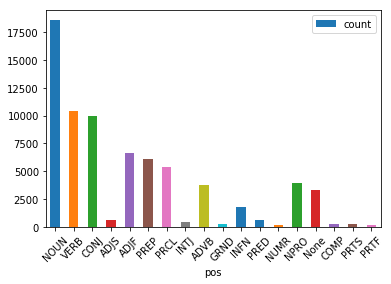

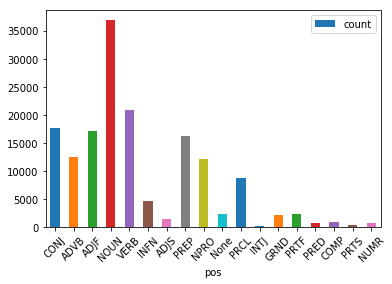

In [13]:
fem_df.plot.bar(x='pos', y='count', rot=45)
mal_df.plot.bar(x='pos', y='count', rot=45)

In [14]:
merged = []
for pos in fem_data:
    for pos2 in mal_data:
        if pos[0] == pos2[0]:
            new_pos = [pos[0], pos[1], pos2[1]]
            merged.append(new_pos)

In [15]:
merged_df = pd.DataFrame(merged, columns=["pos", "female", "male"])
merged_df['pos'] = merged_df['pos'].astype(str)

In [16]:
merged = []
for pos in fem_data:
    for pos2 in mal_data:
        if pos[0] == pos2[0]:
            new_pos = [pos[0], pos[2], pos2[2]]
            merged.append(new_pos)

In [17]:
merged_perc_df = pd.DataFrame(merged, columns=["pos", "female", "male"])
merged_perc_df['pos'] = merged_df['pos'].astype(str)

In [18]:
merged_df

,pos,female,male
0,NOUN,18542,36853
1,VERB,10399,20899
2,CONJ,9963,17702
3,ADJS,682,1413
4,ADJF,6611,17092
5,PREP,6155,16238
6,PRCL,5369,8826
7,INTJ,474,286
8,ADVB,3792,12574
9,GRND,289,2211


In [19]:
merged_perc_df

,pos,female,male
0,NOUN,25.335,23.229
1,VERB,14.209,13.173
2,CONJ,13.613,11.158
3,ADJS,0.932,0.891
4,ADJF,9.033,10.773
5,PREP,8.410,10.235
6,PRCL,7.336,5.563
7,INTJ,0.648,0.180
8,ADVB,5.181,7.926
9,GRND,0.395,1.394


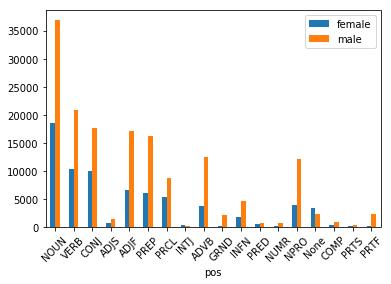

In [20]:
merged_df.plot.bar(x='pos', rot=45)

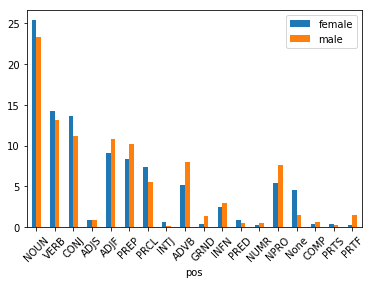

In [22]:
merged_perc_df.plot.bar(x='pos', rot=45)

In [21]:
with open('merged.csv', 'w') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['pos', 'female', 'male'])
        for pos in merged:
            writer.writerow(pos) 